## Notebook 8: Bayesian Networks

**Goal:**  
Explore conditional dependencies between features and the target variable (Conversion) using a Bayesian Network.

This notebook:
- Loads the cleaned dataset
- Discretizes features for structure learning
- Learns a network using Hill Climb Search (BIC scoring)
- Visualizes the graph and discusses key relationships

### Imports and loading data

In [9]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pyagrum.skbn as skbn
import pyagrum.lib.notebook as gnb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
rs = 1234

In [11]:
df = pd.read_csv("C:/Users/laxjo/Downloads/digital_marketing_campaign_dataset_cleaned.csv")
df.shape



(7851, 21)

In [12]:
import pickle

# Load the train/test splits from pickle files
with open("C:/Users/laxjo/Downloads/MISY331/331FinalProject/X_train.p", 'rb') as f:
    X_train = pickle.load(f)

with open("C:/Users/laxjo/Downloads/MISY331/331FinalProject/X_test.p", 'rb') as f:
    X_test = pickle.load(f)

with open("C:/Users/laxjo/Downloads/MISY331/331FinalProject/y_train.p", 'rb') as f:
    y_train = pickle.load(f)

with open("C:/Users/laxjo/Downloads/MISY331/331FinalProject/y_test.p", 'rb') as f:
    y_test = pickle.load(f)

In [24]:
bnc = skbn.BNClassifier(learningMethod = 'TAN') ## Specifies how the Network is Learned.

bnc.fit(X_train, y_train)

y_train_hat = bnc.predict(X_train)
y_test_hat = bnc.predict(X_test)

bnc.score(X_train, y_train), bnc.score(X_test, y_test)

(0.8646496815286624, 0.8026734563971992)

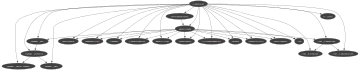

In [25]:
gnb.showBN(bnc.bn)

In [22]:
from sklearn.inspection import permutation_importance

perm_import = permutation_importance(bnc,          ## The Model we are evaluating (tuned!)
                                     X_train,         
                                     y_train,
                                     n_repeats=5, ## The Number of shuffles (permutations) to do FOR EACH variable
                                     random_state=rs)

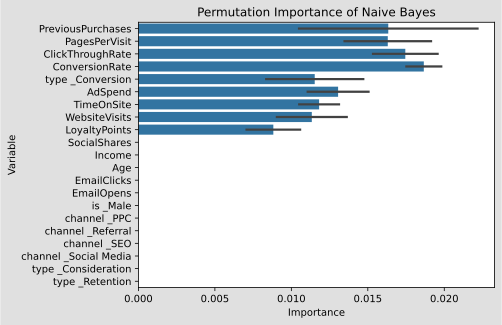

In [23]:
## Plot
import seaborn as sns


perm_import_df = pd.DataFrame(perm_import['importances'].transpose(),  
                                 columns = df.columns.tolist())

perm_import_df_mlt = perm_import_df.melt(value_vars=df.columns.tolist(), 
                                         var_name='Variable', 
                                         value_name='Importance').sort_values(by = 'Importance', ascending= False)

sns.barplot(data = perm_import_df_mlt,
            y = 'Variable',
            x = 'Importance', 
            errorbar = 'sd')
plt.title("Permutation Importance of Naive Bayes");